### Stock Price Prediction of HDFC Bank:

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "/content/drive/MyDrive/HDFC_StockData.csv"
hdfc_data = pd.read_csv(file_path)

In [3]:
hdfc_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
hdfc_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400


In [5]:
hdfc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

**Opening Price Analysis:**

In [6]:
import plotly.express as px
fig = px.line(hdfc_data, x='Date', y="Open")
fig.show()

In [7]:
print(hdfc_data.Date.max())
print(hdfc_data.Date.min())

2021-04-30
2000-01-03


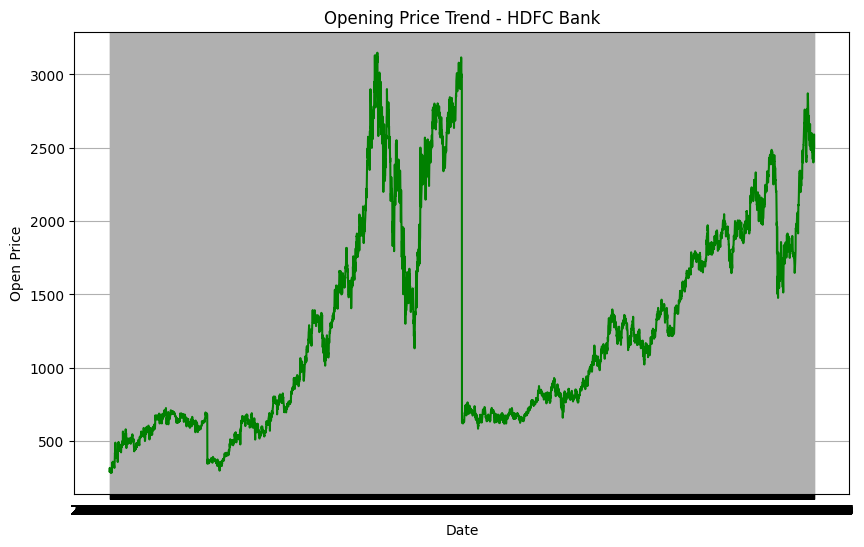

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named hdfc_data
plt.figure(figsize=(10, 6))

sns.lineplot(data=hdfc_data, x='Date', y='Open', color='green')
plt.title('Opening Price Trend - HDFC Bank')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)

plt.show()

**Preprocessing the Time Series Data:**

In [9]:
hdfc_data.shape

(5306, 15)

In [10]:
# Converting Object dtype to datetime64
date_train = pd.to_datetime(hdfc_data['Date'])

In [11]:
date_train

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5301   2021-04-26
5302   2021-04-27
5303   2021-04-28
5304   2021-04-29
5305   2021-04-30
Name: Date, Length: 5306, dtype: datetime64[ns]

**Scaling and Normalization:**

In [17]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Create a StandardScaler object
Scale = StandardScaler()

# Data preparation function for LSTM
def data_prep(df, lookback, future, scaler):
    date_train = pd.to_datetime(df.index)
    df_train = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume']].astype(float)
    df_train_scaled = scaler.fit_transform(df_train)
    X, y = [], []
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, :])
        y.append(df_train_scaled[i+future-1:i+future, 0])
    return np.array(X), np.array(y), df_train, date_train

# Parameters
lookback_window, future_time_steps = 30, 1

# Data preparation using the function
Lstm_x, Lstm_y, hdfc_data, date_train = data_prep(hdfc_data, lookback_window, future_time_steps, Scale)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization, Dense

def create_and_train_lstm_model(X, y):
    """
    Create and train an LSTM model for regression.

    Parameters:
    - X (numpy array): Input sequences.
    - y (numpy array): Target values.

    Returns:
    - model (Sequential): Trained LSTM model.
    """
    # Build LSTM model
    model = tf.keras.Sequential([
        LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
        Dropout(0.2),
        BatchNormalization(),
        LSTM(32, activation='relu', return_sequences=False),
        Dropout(0.2),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dense(y.shape[1], activation='relu')
    ])

    # Initialize the optimizer
    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
    model.compile(loss='mse', optimizer=opt)

    # Initialize early stopping
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)

    # Train the model
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)

    # Return the trained model
    return model


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def Lstm_model1(X, y):
    # Build LSTM model
    regressor = Sequential()

    # Add LSTM layers with dropout
    for _ in range(3):
        regressor.add(LSTM(units=50, return_sequences=True))
        regressor.add(Dropout(0.2))

    # Final LSTM layer without return sequences
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))

    # Output layer
    regressor.add(Dense(units=1))

    # Compile the model
    regressor.compile(optimizer='adam', loss='mean_squared_error')

    # Early stopping to prevent overfitting
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)

    # Train the model
    regressor.fit(X, y, epochs=100, validation_split=0.1, batch_size=64, verbose=1, callbacks=[es])

    # Return the trained model
    return regressor


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization, Dense
from tensorflow.keras import optimizers

def Lstm_model2(X, y):
    """
    Create and train an LSTM model for regression.

    Parameters:
    - X (numpy array): Input sequences.
    - y (numpy array): Target values.

    Returns:
    - model (Sequential): Trained LSTM model.
    """
    # Build LSTM model
    model = Sequential([
        LSTM(20, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        Dropout(0.2),
        BatchNormalization(),
        # LSTM(15, return_sequences=True),
        # Dropout(0.2),
        # BatchNormalization(),
        LSTM(15),
        Dropout(0.2),
        BatchNormalization(),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error', optimizer=adam)

    # Initialize early stopping
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)

    # Train the model
    model.fit(X, y, validation_split=0.2, epochs=100, batch_size=64, verbose=1, callbacks=[es])

    # Return the trained model
    return model

In [21]:
def predict_open(model, date_train, Lstm_x, df_train, future, Scale):
    """
    Predict the opening prices using the trained LSTM model.

    Parameters:
    - model: Trained LSTM model.
    - date_train: List of training dates.
    - Lstm_x: Input sequences for prediction.
    - df_train: Training dataframe.
    - future: Number of future periods to predict.
    - Scale: Scaler for descaling predictions.

    Returns:
    - predicted_descaled: Predicted opening prices (descaled).
    - forecasting_dates: Dates corresponding to the predicted values.
    """
    forecasting_dates = pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted = model.predict(Lstm_x[-future:])
    predicted1 = np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled = Scale.inverse_transform(predicted1)[:, 0]
    return predicted_descaled, forecasting_dates

def output_prep(forecasting_dates, predicted_descaled):
    """
    Prepare the final dataframe for predicted opening prices.

    Parameters:
    - forecasting_dates: Dates corresponding to the predicted values.
    - predicted_descaled: Predicted opening prices (descaled).

    Returns:
    - df_final: Final dataframe with Date and Open columns.
    """
    dates = [i.date() for i in forecasting_dates]
    df_final = pd.DataFrame(columns=['Date', 'Open'])
    df_final['Date'] = pd.to_datetime(dates)
    df_final['Open'] = predicted_descaled
    return df_final

In [22]:
def results(df, lookback, future, Scale, x):
    """
    Generate and display results for the LSTM model.

    Parameters:
    - df: DataFrame containing historical data.
    - lookback: Number of past periods to consider.
    - future: Number of future periods to predict.
    - Scale: Scaler for data normalization/denormalization.
    - x: Title for the plot.

    Returns:
    - None (displays plots).
    """
    # Prepare data for training
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)

    # Train the LSTM model
    model = Lstm_model1(Lstm_x, Lstm_y)

    # Plot training loss
    loss = pd.DataFrame(model.history.history)
    loss.plot()

    # Predict future opening prices
    predicted_descaled, forecasting_dates = predict_open(model, date_train, Lstm_x, df_train, future, Scale)

    # Prepare and display results
    results = output_prep(forecasting_dates, predicted_descaled)
    print(results.head())

    # Show loss plot
    plt.show()

    # Show area plot of predicted opening prices
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

Epoch 1/100
75/75 [==============================] - 21s 132ms/step - loss: 0.1065 - val_loss: 0.0662
Epoch 2/100
75/75 [==============================] - 6s 78ms/step - loss: 0.0362 - val_loss: 0.0286
Epoch 3/100
75/75 [==============================] - 8s 101ms/step - loss: 0.0305 - val_loss: 0.0254
Epoch 4/100
75/75 [==============================] - 6s 86ms/step - loss: 0.0266 - val_loss: 0.1120
Epoch 5/100
75/75 [==============================] - 6s 83ms/step - loss: 0.0340 - val_loss: 0.0373
Epoch 6/100
75/75 [==============================] - 8s 105ms/step - loss: 0.0228 - val_loss: 0.0134
Epoch 7/100
75/75 [==============================] - 6s 81ms/step - loss: 0.0224 - val_loss: 0.0136
Epoch 8/100
75/75 [==============================] - 8s 112ms/step - loss: 0.0190 - val_loss: 0.0114
Epoch 9/100
75/75 [==============================] - 6s 79ms/step - loss: 0.0186 - val_loss: 0.0138
Epoch 10/100
75/75 [==============================] - 8s 105ms/step - loss: 0.0177 - val_loss: 

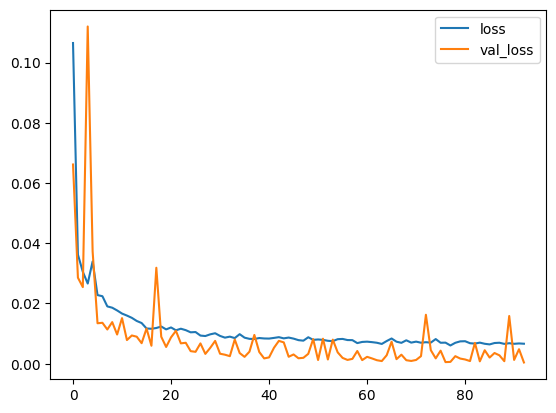

In [24]:
results(hdfc_data, 30, 1, Scale, 'HDFC')